# Review of Probability

**Probability theory** provides a formal framework for studying **uncertainty**. Uncertainty is a key concept in machine learning, arising from noisy measurements, finite data, choice of model parameters, and other factors. 

This lab provides a review of some key concepts from probability that can be useful for deriving and analyzing machine learning algorithms. Each concept is accompanied with a concrete numerical example.

The content is based on the lecture note and the [Stanford CS229 probability review](http://cs229.stanford.edu/section/cs229-prob.pdf), which you can read for more details.

#### Outline
- Density and Mass Functions
- Common Distributions
- Expectation, Variance, Mode
- Joint Distribution
- Marginal Distribution
- Chain Rule
- Bayes Rule

In [116]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Density and mass functions

It is common to ignore the subleties of the event space, probability measure, and random variable. Instead, we just specify a random variable through a **function**.

### Discrete random variable: probability mass function

We directly specify the probability of each value that the random variable $X$ can assume. When the random variable takes a *countable* (finite) number of values $\Omega$:

- **Probability mass function (pmf)** $p : \Omega\rightarrow \mathbb{R}$

where 
- $p(x)\geq 0$ for $x\in \Omega$
- $\sum_{x\in\Omega} p(x)=1$.


#### Example: pmf for rolling a six-sided die

In [33]:
sample_space = {1, 2, 3, 4, 5, 6}

die_pmf = {x: 1/6 for x in sample_space}

for value in sample_space:
    print("Probability of %s: %.2f" % 
         (value, die_pmf[value]))

Probability of 1: 0.17
Probability of 2: 0.17
Probability of 3: 0.17
Probability of 4: 0.17
Probability of 5: 0.17
Probability of 6: 0.17


#### Example: pmf for rolling an odd or even number

In [117]:
vals = {'ODD': 0, 'EVEN': 1}

sample_space = {vals['ODD'], vals['EVEN']}

pmf = {vals['ODD']: die_pmf[1] + die_pmf[3] + die_pmf[5],
       vals['EVEN']: die_pmf[2] + die_pmf[4] + die_pmf[6]}

for value in vals:
    print("Probability of %s: %.2f" % 
         (value, pmf[vals[value]]))

Probability of ODD: 0.50
Probability of EVEN: 0.50


### Continuous random variable: cumulative density function (cdf) & probability density function (pdf)

A **continuous** random variable takes an uncountable (infinite) number of values, e.g. $\Omega=\mathbb{R}$.

The cumulative density function tells us the total probability up to a value:
- **Cumulative density function (cdf)**: $F:\mathbb{R}\rightarrow [0,1]$
$$\large F(x)=P(X\leq x)$$


#### Example:

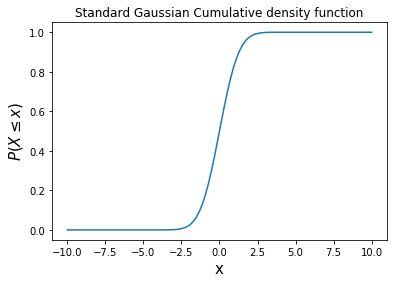

In [35]:
import scipy.stats as stats
from scipy.stats import norm
xs = np.linspace(-10, 10, 100)
ys = norm.cdf(xs)

plt.plot(xs, ys)
plt.title("Standard Gaussian Cumulative density function", fontsize=12)
plt.xlabel("x", fontsize=15)
plt.ylabel("$P(X\leq x)$", fontsize=15);

Given a cdf we can obtain a **probability density function** which is the continuous analogue to the probability mass function:
- **Probability density function (pdf):**
\begin{align}
\large \underbrace{f(x)}_{\text{pdf}} &\large = \underbrace{\frac{dF(x)}{dx}}_{\text{derivative of cdf}}\\
\large \underbrace{F(x)}_{\text{cdf}}&\large =\int_{-\infty}^x \underbrace{f(x)}_{\text{pdf}}dx
\end{align}

- $f(x)\geq 0$
- $\int_{-\infty}^{\infty}f(x)=1$
- $\int_{a}^{b}f(x)=P(a\leq X \leq b)$

**Note:**
- $f(x)\neq P(X=x)$. $f(x)$ can be greater than 1!

#### Example:

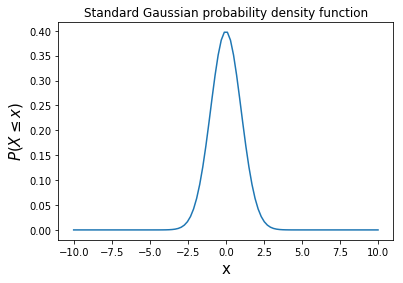

In [36]:
xs = np.linspace(-10, 10, 100)
ys = norm.pdf(xs)

plt.plot(xs, ys)
plt.title("Standard Gaussian probability density function", fontsize=12)
plt.xlabel("x", fontsize=15)
plt.ylabel("$P(X\leq x)$", fontsize=15);

## Common distributions

We will now look at some common random variables through their cdf's and pmf/pdf's. We'll simply refer to each as a "distribution".

#### Discrete: Bernoulli Distribution

Models random variables that take on binary values (e.g. a coin flip), meaning the sample space is $\{0,1\}$. 

The Bernoulli Distribution $Bern(\mu)$, where $\mu\in[0,1]$ is the probability of variable being 1, is defined by the $pmf$:

$$
\large p(X;\mu) = \mu^{X} \left(1-\mu\right) ^{1 - X}
$$

**^Where have you seen this before?**

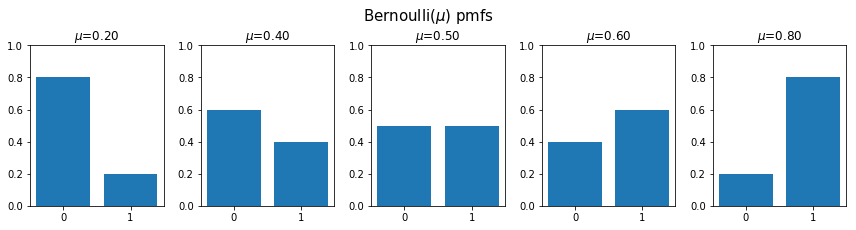

In [37]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
for i, mu in enumerate([0.2, 0.4, 0.5, 0.6, 0.8]):
    P = stats.bernoulli(mu)
    axs[i].bar([0, 1], [1-mu, mu])
    axs[i].set_title('$\mu$=%.2f' % mu, fontsize=12)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['0', '1'])
    axs[i].set_ylim([0, 1])
    
fig.suptitle('Bernoulli($\mu$) pmfs', fontsize=15, y=1.05);
plt.tight_layout()

#### Discrete: Categorical Distribution

We now consider a random variable which can take one of $K$ discrete values, $x\in \{1, 2, \ldots, K\}$.

Suppose that a **value** $x$ is represented as a one-hot vector, $\mathbf{x}\in \{0,1\}^K$. For instance, $x=3$ with $K=6$ classes would be represented as:
$$\mathbf{x}=(0, 0, 1, 0, 0, 0).$$

The **parameter** for a categorical distribution is a $K$-dimensional vector:
\begin{align}
\mathbf{p}=(p_1,p_2,\ldots,p_K),\\
\sum_i p_i =1,\\
p_i\geq 0.
\end{align}

The *pmf* of a categorical distribution, $Cat(\mathbf{p})$, is then:

$$\large p(\mathbf{x};\mathbf{p})=\prod_{i=1}^K p_i^{x_i}.$$

**What function have we seen that gives us a valid parameter $\mathbf{p}$ vector**?

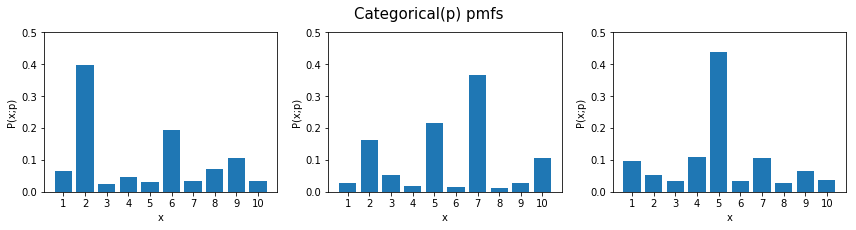

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
K = 10

# --- Generate random parameter vectors (p)
# - Generate 3 random vectors
logits = np.random.randint(1, 5, (3, K)) + np.random.random((3, K))
# - Take the softmax
ps = np.exp(logits) / np.sum(np.exp(logits), 1)[:, None]

for i, p in enumerate(ps):
    P = stats.multinomial(1, p)  # categorical is implemented as a special case of a multinomial
    axs[i].bar(range(1, K+1), p)
    axs[i].set_xticks(range(1, K+1))
    axs[i].set_ylim([0, 0.5])
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('P(x;p)')
    
fig.suptitle('Categorical(p) pmfs', fontsize=15, y=1.05);
plt.tight_layout()

### Gaussian Distribution

The Gaussian, or normal distribution, denoted $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, is a widely used model for continuous variables. It is identified with two parameters. 

The **univariate Gaussian**, i.e. $x\in\mathbb{R}$, has a mean $\mu\in\mathbb{R}$ parameter and variance $\sigma^2\in\mathbb{R}_{>0}$ parameter. The *pdf* is 

$$ f(x;\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right) $$

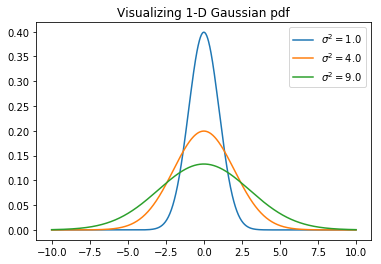

In [106]:
mu = 0
for sigma in np.linspace(1.0, 3.0, 3):
    P = stats.multivariate_normal(mean=mu, cov=sigma**2)
    plt.plot(
        np.linspace(-10, 10, 1000), 
        P.pdf(np.linspace(-10, 10, 1000)), 
        label='$\sigma^2=%.1f$' % (sigma**2)
    )

plt.title('Visualizing 1-D Gaussian pdf')
plt.legend(loc='best')
plt.show()

## Expection, Variance, Mode

$$\large \mathbb{E}[X]=\sum_{x\in\Omega}p(x)x$$

In [107]:
expected_x = np.sum(
    [die_pmf[x]*x for x in die_pmf]
)
expected_x

3.5

$$\large \text{Var}(X)=\sum_{x\in\Omega}\left[p(x)(x-\mathbb{E}[X])^2\right]$$

In [108]:
var_x = np.sum(
    [die_pmf[x]*((x - expected_x)**2) for x in die_pmf]
)
var_x

2.9166666666666665

$$\large \text{mode}(X)=\arg\max_{x\in\Omega} p(x)$$

**What is the mode of the dice random variable?**

#### Continuous Example:

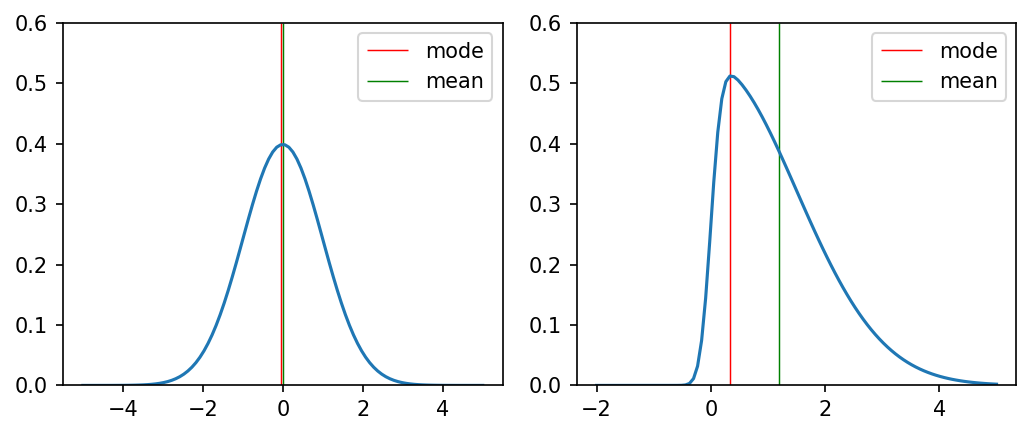

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3), dpi=150)

x = np.linspace(-5, 5, 100)
rv = stats.norm()
axs[0].plot(x, rv.pdf(x))
axs[0].vlines(x[rv.pdf(x).argmax()], 0, 0.6, lw=0.7, label='mode', color='red')
axs[0].vlines(rv.mean(), 0, 0.6, lw=0.7, label='mean', color='green')
axs[0].set_ylim([0, 0.6])
axs[0].legend();

a = 10  # adjust skew
x = np.linspace(-2, 5, 100)
rv = stats.skewnorm(a, scale=1.5)
axs[1].plot(x, rv.pdf(x))
axs[1].vlines(x[rv.pdf(x).argmax()], 0, 0.6, lw=0.7, label='mode', color='red')
axs[1].vlines(rv.mean(), 0, 0.6, lw=0.7, label='mean', color='green')
axs[1].set_ylim([0, 0.6])
axs[1].legend();

plt.tight_layout()

## Joint Distribution

A **joint distribution** gives probabilities for configurations of **multiple random variables**:

Discrete - joint pmf:
- $\large p(x,y)=P(X=x,Y=y)$

Continuous - joint pdf:
- $\large f(x,y)$

#### Example: Multivariate Gaussian
The **multivariate Gaussian**, i.e. $\mathbf{x}\in\mathbb{R}^k$, has a mean parameter $\mathbf{\mu}\in\mathbb{R}^k$ and covariance parameter $\Sigma\in\mathbb{R}^{k\times k}$. The *pdf* is given by

$$
f(\mathbf{x}) = (2\pi)^{-k/2} \det({\Sigma})^{-1/2} \exp{\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

where $\Sigma$ must be positive semi-definite.

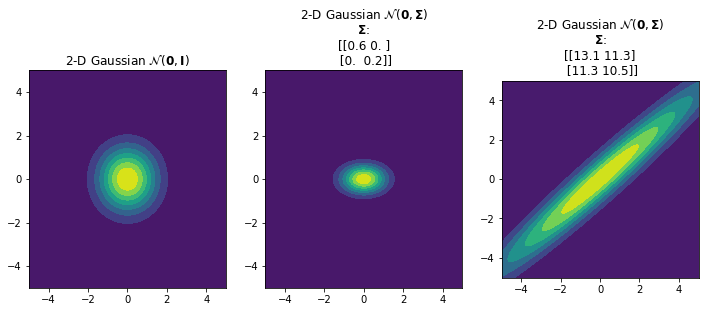

In [86]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
xv, yv = np.meshgrid(x, y)
xy = np.concatenate([np.expand_dims(xv, axis=-1), np.expand_dims(yv, axis=-1)], axis=-1)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))


# Standard normal (covariance matrix Sigma is the identity matrix)
P = stats.multivariate_normal(cov=np.eye(2))
axs[0].contourf(xv, yv, P.pdf(xy), cmap=plt.cm.viridis)
axs[0].set_title('2-D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{I})$')


# Generate a random diagonal covariance matrix
A = np.random.rand(2)[:, None]*3
Sigma = np.eye(2) * A
P = stats.multivariate_normal(cov=Sigma)
axs[1].contourf(xv, yv, P.pdf(xy), cmap=plt.cm.viridis)
axs[1].set_title('2-D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$\n$\mathbf{\Sigma}$:\n%s' % str(np.round(Sigma, 1)))


# Generate a random covariance matrix
A = np.random.rand(2, 2)*3
Sigma = A.dot(A.T)
P = stats.multivariate_normal(cov=Sigma)
axs[2].contourf(xv, yv, P.pdf(xy), cmap=plt.cm.viridis)
axs[2].set_title('2-D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$\n$\mathbf{\Sigma}$:\n%s' % str(np.round(Sigma, 1)))


plt.axis('square')
plt.show()

#### Discrete Example:
- X: 1 if die is even, 0 if die is odd
- Y: 1 if die is prime, 0 otherwise

In [87]:
vals_x = {
    'ODD': 0, 'EVEN': 1
}
vals_y = {
    'NOT_PRIME': 0, 'PRIME': 1
}

joint_pmf = {
    (vals_x['ODD'],  vals_y['NOT_PRIME']): die_pmf[1],
    (vals_x['ODD'],  vals_y['PRIME']):     die_pmf[3] + die_pmf[5],
    (vals_x['EVEN'], vals_y['NOT_PRIME']): die_pmf[4] + die_pmf[6],
    (vals_x['EVEN'], vals_y['PRIME']):     die_pmf[2]
}

for value in joint_pmf:
    print("Probability of %s: %.2f" % 
         (value, joint_pmf[value]))

Probability of (0, 0): 0.17
Probability of (0, 1): 0.33
Probability of (1, 0): 0.33
Probability of (1, 1): 0.17


## Marginal Distribution

We can obtain a variable's pmf (or pdf) by **marginalizing** over a joint variable:

$$\large p(x)=\sum_{y\in\mathcal{Y}}p(x,y)$$

Where $\mathcal{Y}$ is the set of values that $Y$ can take. We refer to $p(x)$ as a **marginal distribution**. The equation above is also referred to as the **sum rule** of probability.

Example: we can recover the pmf for the heads/tails random variable

In [111]:
marginal_x = {
    vals_x['ODD']:  joint_pmf[0, 0] + joint_pmf[0, 1],
    vals_x['EVEN']: joint_pmf[1, 0] + joint_pmf[1, 1]
}

for value in vals_x:
    print("Probability of %s: %.2f" % 
         (value, marginal_x[vals_x[value]]))

Probability of ODD: 0.50
Probability of EVEN: 0.50


## Conditional distribution

$$\large p(Y|X=x)=\frac{p(X=x, Y)}{p(X=x)}$$

or in short,
$$\large p(y|x)=\frac{p(x,y)}{p(x)}$$

#### Product Rule
By a simple rearrangement, we also see that

$\large p(x,y)=p(y|x)p(x)$

which is called the **product rule** of probability.

**Example**: Given that the die roll is odd, what is the probability of it being prime vs. not prime?

$\large p(Y|X=\text{odd})$

In [112]:
def p_y_given_x(y, x):
    # p(Y = not prime | X = odd)
    if x == vals_x['ODD'] and y == vals_y['NOT_PRIME']:
        return (joint_pmf[vals_x['ODD'], vals_y['NOT_PRIME']] / 
                marginal_x[vals_x['ODD']])
    
    # p(Y = prime | X = odd)
    if x == vals_x['ODD'] and y == vals_y['PRIME']:
        return (joint_pmf[vals_x['ODD'],  vals_y['PRIME']] / 
                marginal_x[vals_x['ODD']])

    # p(Y = not prime | X = even)
    if x == vals_x['EVEN'] and y == vals_y['NOT_PRIME']:
        return (joint_pmf[vals_x['EVEN'], vals_y['NOT_PRIME']] / 
                marginal_x[vals_x['EVEN']])
    
    # p(Y = prime | X = even)
    if x == vals_x['EVEN'] and y == vals_y['PRIME']:
        return (joint_pmf[vals_x['EVEN'],  vals_y['PRIME']] / 
                marginal_x[vals_x['EVEN']])

for val_x in vals_x:
    for val_y in vals_y:
        print("p(Y=%s | X=%s): %.2f" % 
             (val_y, 
              val_x, 
              p_y_given_x(vals_y[val_y], vals_x[val_x])))

p(Y=NOT_PRIME | X=ODD): 0.33
p(Y=PRIME | X=ODD): 0.67
p(Y=NOT_PRIME | X=EVEN): 0.67
p(Y=PRIME | X=EVEN): 0.33


#### Example: Conditional gaussian

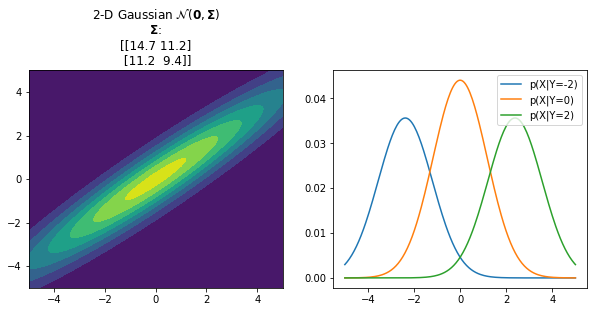

In [113]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
xv, yv = np.meshgrid(x, y)
xy = np.concatenate([np.expand_dims(xv, axis=-1), np.expand_dims(yv, axis=-1)], axis=-1)

# Generate a random covariance matrix
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

A = np.random.rand(2, 2)*3
Sigma = A.dot(A.T)
P = stats.multivariate_normal(cov=Sigma)
axs[0].contourf(xv, yv, P.pdf(xy), cmap=plt.cm.viridis)
axs[0].set_title('2-D Gaussian $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$\n$\mathbf{\Sigma}$:\n%s' % str(np.round(Sigma, 1)))


for y in [-2, 0, 2]:
    xs = np.linspace(-5, 5, 200)
    ys = np.ones(200)*y
    xy = np.stack([xs, ys]).T
    z = P.pdf(xy)
    axs[1].plot(xs, z, label='p(X|Y=%d)' % y);
    
plt.legend();

#### In general: Chain rule of probability

The **chain rule of probability** generalizes the product rule for random variables $X_1,X_2,\ldots,X_n$:
$$\large p(x_1,x_2,\ldots,x_n)=\prod_{i=1}^n p(x_i|x_{<i})$$

Example:
\begin{align}
\large p(x_1,x_2,x_3)&=\large p(x_3|x_1,x_2)p(x_1,x_2)\\
                     &=\large p(x_3|x_1,x_2)p(x_2|x_1)p(x_1)\\
\end{align}

**Note**: any order is valid!

### Bayes Rule

Finally, we have **Bayes Rule**:

$$
{\large
\overbrace{p(Y|X)}^{\text{posterior}} = \frac{\overbrace{p(X|Y)}^{\text{likelihood}}\overbrace{p(Y)}^{\text{prior}}}{P(X)}
}
$$

which you can derive from the rules above.

We will discuss this rule in the context of machine learning in depth next week.

**Example:** Above we found $p(Y|X=\text{odd})$, and the marginal $p(X)$. Using these distributions, suppose we want to know the probability that the die roll was odd, given that the roll was prime, $p(X=\text{odd}|Y=\text{prime})$. We have,

\begin{align}
p(X=\text{odd}|Y=\text{prime})&=\frac{p(Y=\text{prime}|X=\text{odd})p(X=\text{odd})}{p(Y=\text{prime})}\\
                              &=\frac{p(Y=\text{prime}|X=\text{odd})p(X=\text{odd})}{p(Y=\text{prime}|X=\text{odd})p(X=\text{odd})+p(Y=\text{prime}|X=\text{even})p(X=\text{even})}\\
\end{align}

In [114]:
numerator = (p_y_given_x(vals_y['PRIME'], vals_x['ODD']) * marginal_x[vals_x['ODD']])

denominator = (p_y_given_x(vals_y['PRIME'], vals_x['ODD']) * marginal_x[vals_x['ODD']] + 
               p_y_given_x(vals_y['PRIME'], vals_x['EVEN']) * marginal_x[vals_x['EVEN']])

print("p(X=ODD | Y=PRIME): %.3f" % 
     (numerator/denominator))

p(X=ODD | Y=PRIME): 0.667


Primes: 2, 3, 5

Odd primes: 3, 5